In [1]:
#Intstalling the required dependancies
#!pip install tensorflow, !pip install os 
import tensorflow as tf
import os

2023-04-10 13:51:28.996750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Checking to see if we are in the correct working directory
os.getcwd()

'/Users/kulit/Desktop/CapClassifier'

In [3]:
# Showing the list of files within the folder
#Full is the folder containing whole images of the cpaillaries and components
#Crop is the folder that contains images focused on the cpaillaries with minimal componenets included 
dir = os.listdir('Data')
print(dir)

['Full', 'Crop']


In [4]:
# Takes the images from the working directory and generates a dataset
# 600 files, 300 from Full and 300 from Crop. These have been assigned 2 classes. 
CapillaryDataset= tf.keras.utils.image_dataset_from_directory('Data')


Found 600 files belonging to 2 classes.


In [5]:
#Intstalling the required dependancies
#!pip install numpy, !pip install matplotlib 
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#Iterator converts the dataset. itno a numpy array 
CapillaryIterator = CapillaryDataset.as_numpy_iterator()

2023-04-10 13:51:37.104768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-10 13:51:37.105206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


In [7]:
#Returns the next item of the CapillaryIterator 
CapillaryBatch = CapillaryIterator.next()

In [8]:
#Returns the values of the length of the images and the images with labels
len(CapillaryBatch)

2

In [9]:
#Viewing if the images are batched correctly, batch size is 32, size is 256 by 256, and is in RGB
CapillaryBatch[0].shape 

(32, 256, 256, 3)

In [10]:
#Viewng the assigned classes to the dataset. Class 0 = Cappillary, Class 1 = Capillary & Components
CapillaryBatch[1]

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int32)

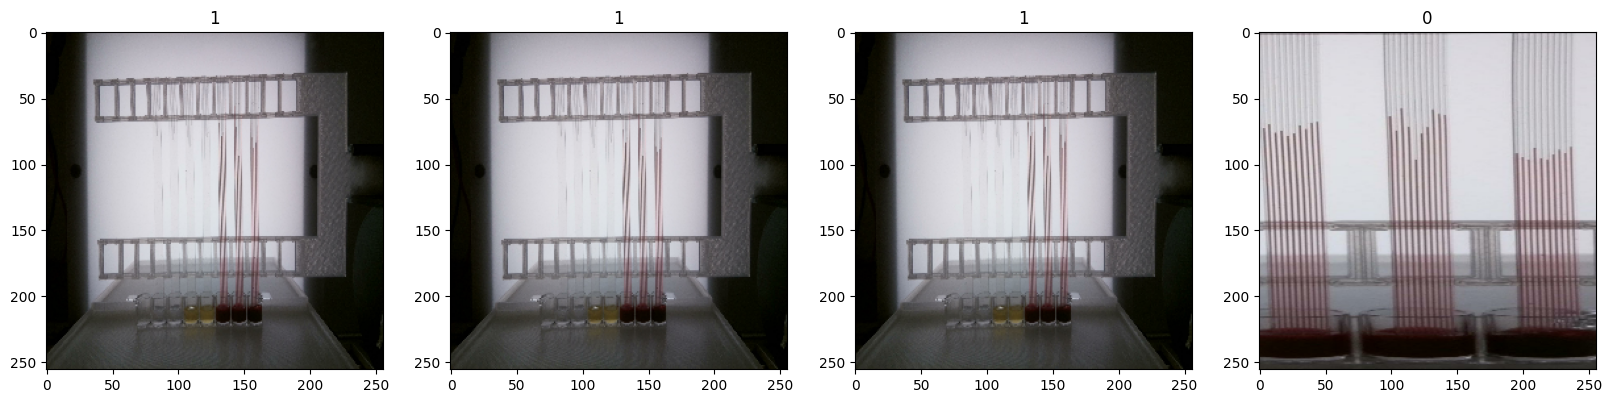

In [11]:
# Plotting the first 4 images of the CapillaryBatch, with a label of the assigned class 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(CapillaryBatch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(CapillaryBatch[1][idx])

In [12]:
#The largest value is less than 255
CapillaryBatch[0].max()

235.44582

In [13]:
# making the value of the batch a variable to be inputted into the CapillaryDataMap
ValueofBatch= CapillaryBatch[0].max()

In [14]:
#Dividing by 255 which is the highest value a pixel can be 
ScaledBatch = CapillaryBatch[0]/ValueofBatch

In [15]:
#The max value will be less than 1 and the min value will be 0, which are more ideal values for the network 
ScaledBatch.max()


1.0

In [16]:
ScaledBatch.min()

0.0

In [17]:
#Map fucntion allows the data to proccessed and transformed without a loop
#Images are x, and are the independant features, target variables are y. 
#After the batch is loaded, divide the image values by 255 (x/255) and no transformation on y

CapillaryDataMap = CapillaryDataset.map(lambda x,y: (x/ValueofBatch, y)) 

In [18]:
CapillaryDataMap.as_numpy_iterator().next()

2023-04-10 13:51:47.167828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-10 13:51:47.168939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


(array([[[[4.76572625e-02, 3.49154770e-02, 5.18464576e-03],
          [3.51726376e-02, 2.24308502e-02, 0.00000000e+00],
          [4.46874984e-02, 3.19457129e-02, 0.00000000e+00],
          ...,
          [3.87645587e-02, 4.32772748e-02, 6.22157473e-04],
          [3.71884257e-02, 3.71884257e-02, 8.21247871e-04],
          [2.98552644e-02, 2.98552644e-02, 0.00000000e+00]],
 
         [[3.75617221e-02, 2.48199347e-02, 0.00000000e+00],
          [4.76655588e-02, 3.49237733e-02, 6.80225494e-04],
          [5.37709966e-02, 4.10292111e-02, 4.79476014e-03],
          ...,
          [3.58445644e-02, 4.03572805e-02, 0.00000000e+00],
          [4.10872810e-02, 4.10872810e-02, 0.00000000e+00],
          [3.32066193e-02, 3.32066193e-02, 0.00000000e+00]],
 
         [[4.55170423e-02, 3.27752568e-02, 0.00000000e+00],
          [3.30821872e-02, 2.03404017e-02, 0.00000000e+00],
          [4.97311205e-02, 3.69893350e-02, 3.98180773e-03],
          ...,
          [3.94779667e-02, 3.94779667e-02, 1.1198

In [19]:
# Finding the legnth for the data
len(CapillaryDataMap)

19

In [20]:
TrainingSize = int(len(CapillaryDataMap)*.6)+2 
ValidationSize = int(len(CapillaryDataMap)*.2)+1# 4 for validation
TestingSize = int(len(CapillaryDataMap)*.1)+1# 2 for testing

In [21]:
TrainingSize 

13

In [22]:
ValidationSize

4

In [23]:
TestingSize

2

In [24]:
#Partioning the Data
TrainData = CapillaryDataMap.take(TrainingSize)
#Skipping the 13 batches assigned to Training and 4 for Validation
ValidationData = CapillaryDataMap.skip(TrainingSize).take(ValidationSize)
# Skipping the 17 batches assigned to Training anf Validation and 2 batches for Testing
TestingData = CapillaryDataMap.skip(TrainingSize+ValidationSize).take(TestingSize)

In [25]:
#Intstalling the required dependancies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Dense, MaxPooling2D, Conv2D, Flatten

In [26]:
# adding a conv and max poooling layer
# adding sequentially so the first layer is the input
# conv has 16 filters that functions. in condensing and extracting features from the image
# to make an output classification
#stride of 1- moves 1 pixel each time
# acivation is relu, takes output from conv and any value below 0 is set to 0
# and then perserves the positive values for plotting
# takes account in non-linear factors 
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# takes the max value after relu and return the value by a 2,2 region
model.add(MaxPooling2D())

#repeated but with 32 filters
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
 
#repeated with 16 filters
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #flatten condesnes to a single value

#
model.add(Dense(32, activation='relu'))

# single outut dense layer range 0 to 1 //either either a full image with components, or cropped images with capillaries as focus 
# tanh activation for binary classification of [-1,1]
model.add(Dense(1, activation='tanh'))


#binary images uses binary_crossentropy for the calculation of the data loss. 
#adam optimizer can iterate over the batches of data
# metrics=['accuracy'] is used to evaluate the perfomance of the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
#Summary of the model and 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [28]:
# Creating a directory called logs to save log files
logdir='logs'

In [29]:
# Calling back log events to visualise the plots of the e.g. metrics summary
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
#Training the model on 15 epochs. Callbacks to retain the log events for plotting.

In [31]:
hist = model.fit(TrainData, epochs=15, validation_data=ValidationData, callbacks=[tensorboard_callback])

Epoch 1/15


2023-04-10 13:51:55.340928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-10 13:51:55.342550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


13/13 [==============================] - ETA: 0s - loss: 0.4279 - accuracy: 0.8029

2023-04-10 13:52:40.801689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-10 13:52:40.802427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


13/13 [==============================] - 64s 4s/step - loss: 0.4279 - accuracy: 0.8029 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/15
13/13 [==============================] - 54s 4s/step - loss: 8.9765e-04 - accuracy: 1.0000 - val_loss: 1.1811e-04 - val_accuracy: 1.0000
Epoch 3/15
13/13 [==============================] - 66s 4s/step - loss: 1.0137e-04 - accuracy: 1.0000 - val_loss: 5.4474e-05 - val_accuracy: 1.0000
Epoch 4/15
13/13 [==============================] - 84s 6s/step - loss: 3.0324e-05 - accuracy: 1.0000 - val_loss: 8.2656e-06 - val_accuracy: 1.0000
Epoch 5/15
13/13 [==============================] - 65s 4s/step - loss: 5.3325e-06 - accuracy: 1.0000 - val_loss: 2.3968e-06 - val_accuracy: 1.0000
Epoch 6/15
13/13 [==============================] - 65s 4s/step - loss: 1.7360e-06 - accuracy: 1.0000 - val_loss: 1.0598e-06 - val_accuracy: 1.0000
Epoch 7/15
13/13 [==============================] - 63s 4s/step - loss: 9.6199e-07 - accuracy: 1.0000 - val_loss: 7.8697e-07 - val_

In [32]:
#Seeing the values of training loss, training accuracy, validation loss and validation accuracy of the trained model
hist.history

{'loss': [0.4279091954231262,
  0.0008976540993899107,
  0.00010137479694094509,
  3.0323833925649524e-05,
  5.332499313226435e-06,
  1.7359886896883836e-06,
  9.619855063647265e-07,
  6.669706635875627e-07,
  5.082156917524117e-07,
  3.9917932781463605e-07,
  3.063335611841467e-07,
  2.4314684310411394e-07,
  2.0317162352512241e-07,
  1.6993057272429724e-07,
  1.548861234823562e-07],
 'accuracy': [0.8028846383094788,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0027592582628130913,
  0.00011810820433311164,
  5.447425792226568e-05,
  8.265567885246128e-06,
  2.3967645574884955e-06,
  1.0598463404676295e-06,
  7.869682008276868e-07,
  5.317854174791137e-07,
  4.661271191253036e-07,
  3.343449179737945e-07,
  2.910383614107559e-07,
  2.2165482960190275e-07,
  1.8626455755565985e-07,
  1.4388936619980086e-07,
  1.2107194891086692e-07],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

In [33]:
#Plotting the Data

In [34]:
#intsalling required dependancies 
import numpy as np 

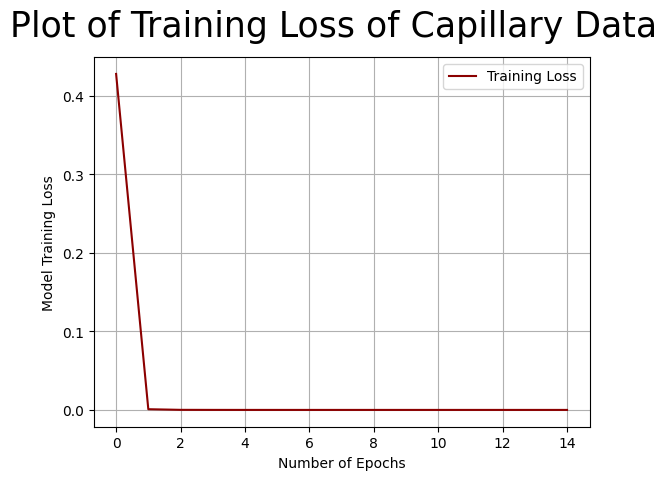

In [35]:
# Plotting Training Loss of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['loss'], label='Training Loss', color='darkred')
fig.suptitle('Plot of Training Loss of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Model Training Loss")
plt.grid()
plt.legend(loc="upper right")
plt.show()

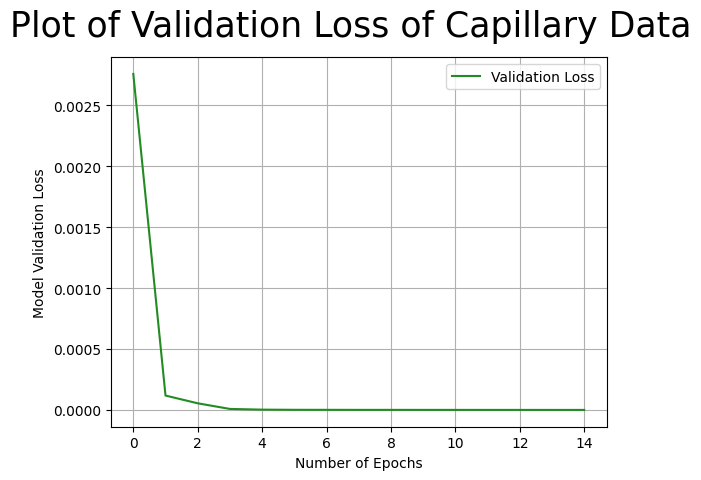

In [36]:
# Plotting Validation Loss of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['val_loss'], label='Validation Loss', color='forestgreen')
fig.suptitle('Plot of Validation Loss of Capillary Data', fontsize=25)
plt.ylabel("Model Validation Loss")
plt.xlabel("Number of Epochs")
plt.grid()
plt.legend(loc="upper right")
plt.show()

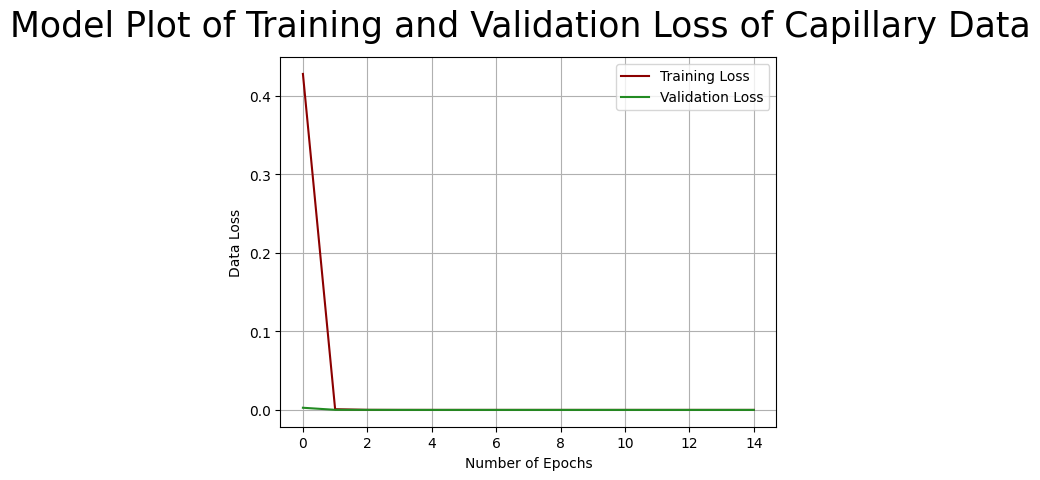

In [37]:
# Plotting both the Training and Validation Loss of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['loss'], label='Training Loss', color='darkred')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='forestgreen',)
fig.suptitle('Model Plot of Training and Validation Loss of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Data Loss")
plt.grid()
plt.legend(loc="upper right")
plt.show()

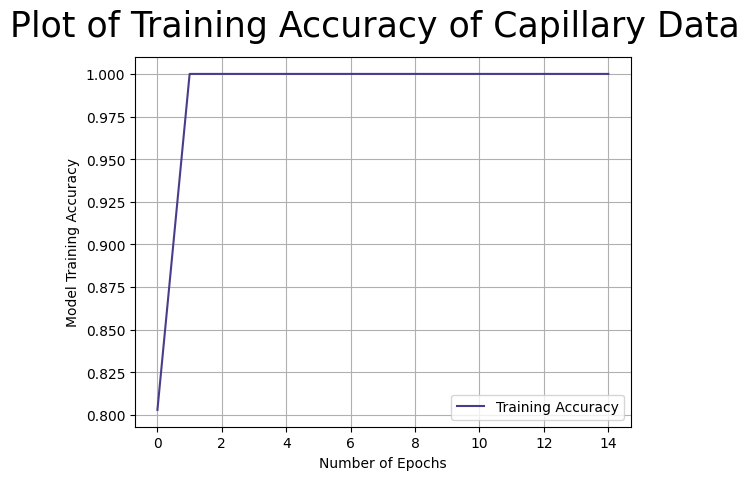

In [38]:
# Plotting the Training Accuracy of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='darkslateblue')
fig.suptitle('Plot of Training Accuracy of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Model Training Accuracy")
plt.grid()
plt.legend(loc="lower right")
plt.show()

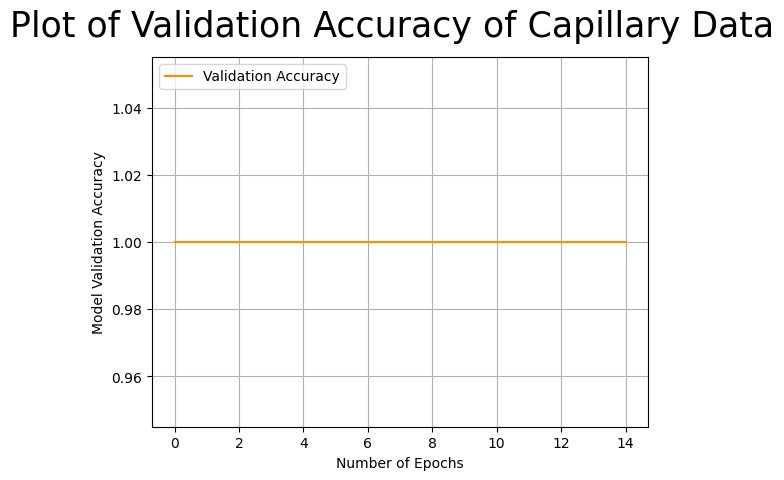

In [39]:
# Plotting the Validation Accuracy of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='darkorange',)
fig.suptitle('Plot of Validation Accuracy of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Model Validation Accuracy")
plt.grid()
plt.legend(loc="upper left")
plt.show()

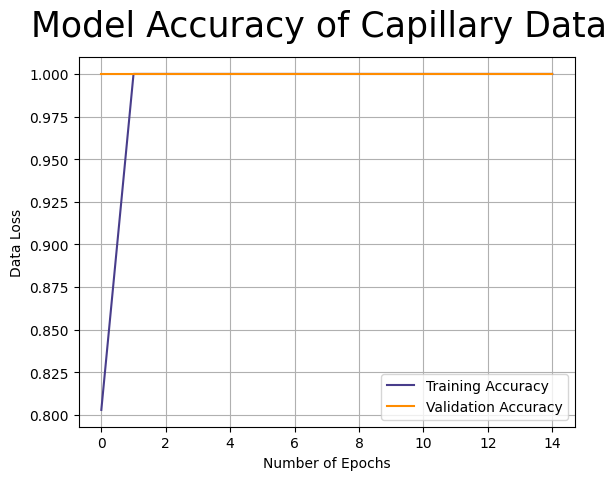

In [40]:
# Plotting both the Training and Validation Accuracy of the Capillary Data
fig = plt.figure()
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='darkslateblue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='darkorange',)
fig.suptitle('Model Accuracy of Capillary Data', fontsize=25)
plt.xlabel("Number of Epochs")
plt.ylabel("Data Loss")
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [41]:
#Evaluating the Model 

In [42]:
#installing dependancies that are used for classification 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
CapillaryPrecision = Precision()  #computes the precision of predicaitons to the labelled image
CapillaryRecall = Recall() #computes the recall of predicaitons to the labelled image
CapillaryAccuacy = BinaryAccuracy()# computes how often the labels match the preictions 

In [47]:
# assgined 2 batches to testing
len(TestingData)

2

In [49]:
# Loop through the 2 batches of the testing data
for batch in TestingData.as_numpy_iterator(): 
    X, y = CapillaryBatch #images and true values
    yhat = model.predict(X) # making predicitons and return values [-1,1] because we have tanh acttivation
    CapillaryPrecision.update_state(y, yhat) #updating metrics that pass through the y true value and yhat model predictioon value
    CapillaryRecall.update_state(y, yhat)
    CapillaryAccuacy.update_state(y, yhat)

2023-04-10 14:54:59.743449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]
2023-04-10 14:54:59.744971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [600]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 466ms/step


In [50]:
#print out result of the metrics, values are between 0 and 1. 
print(f'Precision:{CapillaryPrecision.result().numpy()}, Recall:{CapillaryRecall.result().numpy()}, Accuracy:{CapillaryAccuacy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [53]:
#Testing the Model 
import cv2

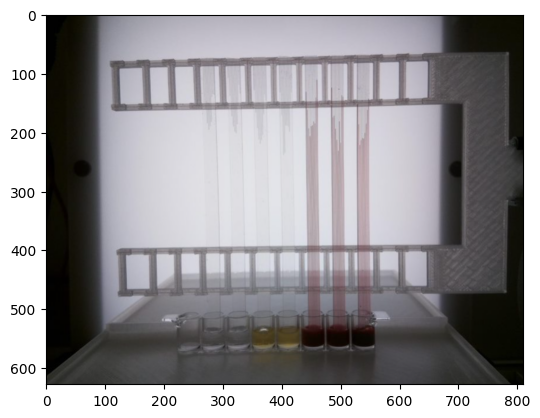

In [54]:
#testing with an unknwon image and can be seen below
img = cv2.imread('x.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #showing in RGB and not BGR
resize = tf.image.resize(img, (256,256))

In [55]:
#passing this image through the model
#np.expand_dims allows the single image to be passed through by outting it through another set of arrays
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 217ms/step


In [56]:
#<0 is going to be capillaries only and >0 is cappillaries and components
yhat

array([[0.9993877]], dtype=float32)

Capillaries & Components 


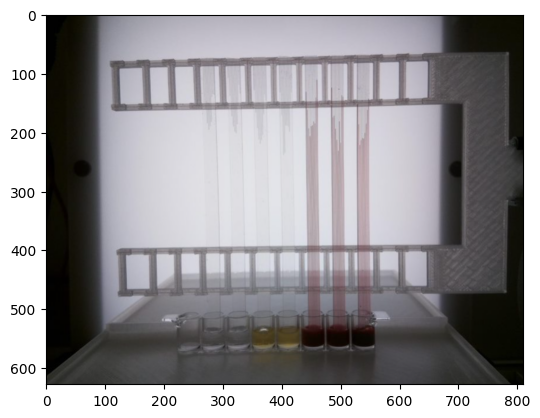

In [57]:
#if the predicted value of yhat is equal to 0 or less than it will print out capillaries and anything higher than 0 is capillaries and components
if yhat  <= 0: 
    print('Capillaries')
else:
    print('Capillaries & Components ')
resize = tf.image.resize(img, (255,255))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),(resize.numpy().astype(int))
plt.show()